In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


part1

In [2]:
x = linspace(-40,60,101)
y = linspace(-25,25,51)
X, Y = meshgrid(x, y)

In [3]:
R1=20
R2=14

In [4]:
x1 = linspace(-20,20,1000)
y1 = sqrt(20**2-x1**2)-25
y1m=-sqrt(20**2-x1**2)-25
x2 = linspace(26,54,1000)
y2 = sqrt(14**2-(x2-40)**2)-25
y2m=-sqrt(14**2-(x2-40)**2)-25

In [5]:
psi = zeros((len(y), len(x)))

for k in range(1000): # iterations
    
    psi[0,:] = 1
    psi[50,:] = 0 #boundary condition
    
    for j in range(1,len(y)-1):
        
        psi[j,0] = (50-j)/50
        psi[j,len(x)-1] = (50-j)/50   #evenly distributed streamlines for far upstream and downstream
        
        for i in range(1,len(x)-1):
            
            psi[j,i] = (psi[j-1,i]+psi[j,i-1]+psi[j,i+1]+psi[j+1,i])/4
            
            if (j-len(y))**2+(i-40)**2<R1**2: #boundary condition of semi-circles
                psi[j,i]=0
            if (j-len(y))**2+(i-80)**2<R2**2:
                psi[j,i]=0

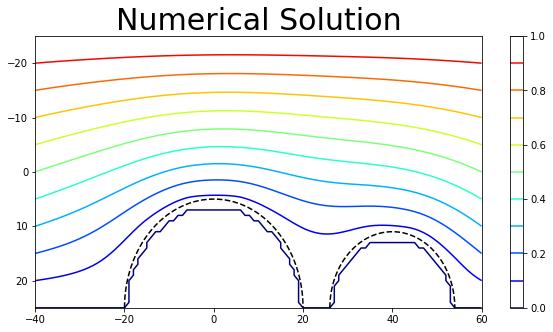

In [6]:
figure(figsize=(10, 5))
contour(X,Y,psi,arange(0,1.05,0.1), cmap='jet')
gca().invert_yaxis()
title('Numerical Solution',fontsize=30)
colorbar()
plot(x1,-y1,'k--')
plot(x2,-y2,'k--')

Part2

$$\psi=U\big(r\sin(\theta)-\frac{{R_1}^{2}}{r_1}\sin(\theta_1)-\frac{{R_2}^{2}}{r_2}\sin(\theta_2)\big)+C$$

$$ r =\sqrt{(x^2+y^2)} \qquad  \theta=\arctan(\frac{y}{x})$$

$$ r_1 =\sqrt{(x^2+(y+25)^2)} \qquad  \theta_1=\arctan(\frac{y+25}{x})$$

$$ r_2 =\sqrt{(x-40)^2+(y+25)^2)} \qquad  \theta_2=\arctan(\frac{y+25}{x-40})$$

far upstream
$$\psi(y=-25)=0$$
$$\psi(y=25)=1$$

$$\Longrightarrow U=0.02    \qquad    C=0.5$$


$$\Longrightarrow \psi=U\big(r_1\sin(\theta_1)-\frac{{R_1}^{2}}{r_1}\sin(\theta_1)-\frac{{R_2}^{2}}{r_2}\sin(\theta_2)\big)$$

In [7]:
x = linspace(-150,150,1000)
y = linspace(-100,50,501)
X,Y = meshgrid(x,y)

In [8]:
r1=(X**2 + (Y+25)**2)**0.5
r2=((X-40)**2 + (Y+25)**2)**0.5
U=1/50
psi=U*((r1-R1**2/r1)*(Y+25)/r1+(-R2**2/r2)*(Y+25)/r2)
for i in range(len(y)):
    for j in range(len(x)):
        if (x[j])**2+(y[i]+25)**2<=(R1)**2:
            psi[i,j]=True
        elif (x[j]-40)**2+(y[i]+25)**2<=(R2)**2:
            psi[i,j]=True
        else:
            pass

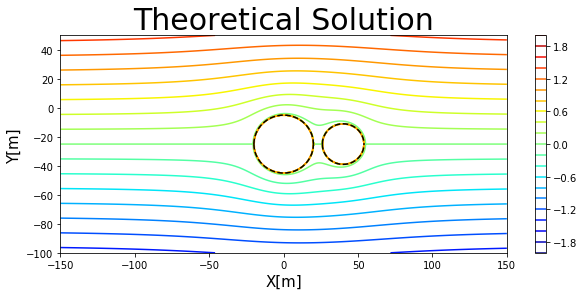

In [10]:
figure(figsize=(10,4))
plot(x1,y1, 'k--')
plot(x2,y2, 'k--')
plot(x1,y1m,'k--')
plot(x2,y2m,'k--')
contour(x,y, psi,arange(-2,2.2,0.2), cmap='jet')
title('Theoretical Solution',fontsize=30)
xlabel('X[m]',fontsize=15)
ylabel('Y[m]',fontsize=15)
colorbar()
show()

For numerical solution, the streamlines close to top boudary (y=25) is more flat, and streamline $\psi=0$  seems more stick to the boundary of those two semi-circles (the area between two semi-circles). 

To make the numberical solution more analytic, we need to increase the grid number to get higher resolution, and also increase the iterations.

Reading

R1:

${\displaystyle \mathrm {Re} ={\frac {\rho uL}{\mu }}={\frac {uL}{\nu }}}$

Reynold’s number is small in a viscous flow because it is inversely proportional to viscosity.

$\nu \sim 10^{-6} $

laminar flow occurs when the Reynolds number is below a critical value of approximately 2,040

$UL \sim 10^{-3}$

R2


When it reaches the steady state, all those work done by drag force becomes heat.